In [2]:
%matplotlib inline
from matplotlib.pylab import plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import pandas as pd
import numpy as np

from statsmodels.tsa import stattools

import pandas.io.data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
yahoo = web.DataReader("F", 'yahoo', start, end)

Populating the interactive namespace from numpy and matplotlib


ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pandas-dev/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.

# Time series relate to themselves

...First, let's look at the auto correlation function

### Let's start with white noise

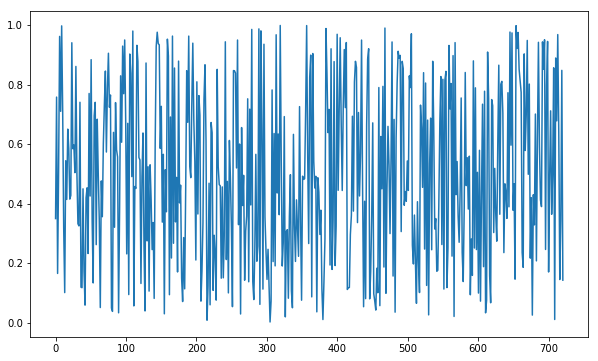

In [3]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
result_curve =  noise
plt.plot(grid, result_curve)

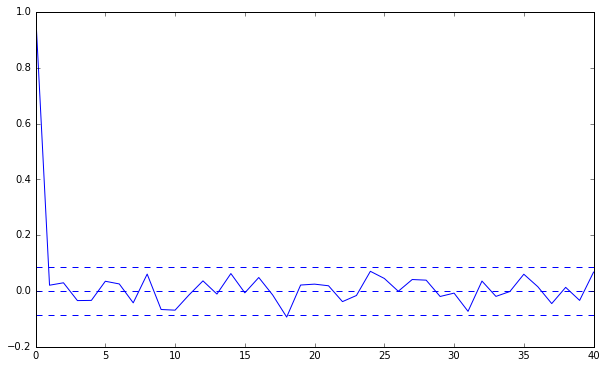

In [6]:
acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### How about a periodic function?

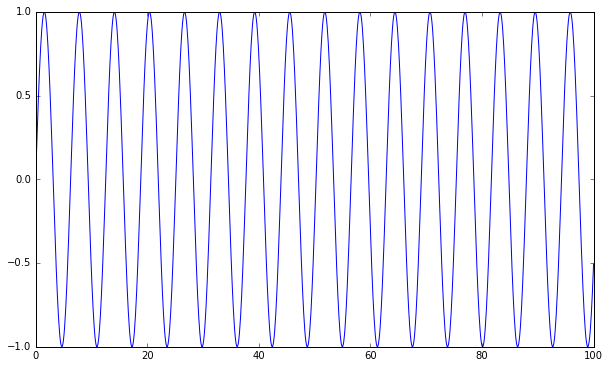

In [7]:
grid = np.linspace(0, 100, 1000)
sin5 = np.sin(grid)
result_curve = sin5 
plt.plot(grid, result_curve)

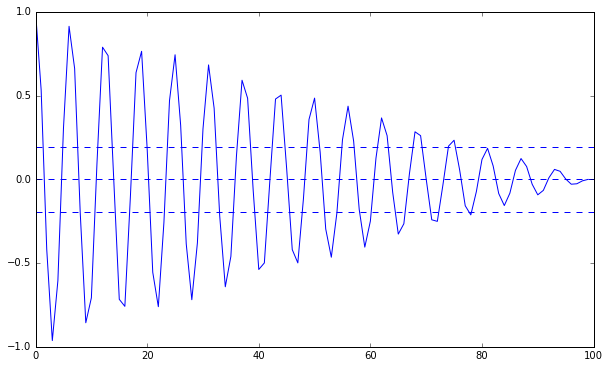

In [17]:
grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5 

acf_result = stattools.acf(result_curve, nlags = 100)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### Now let's look at a real example

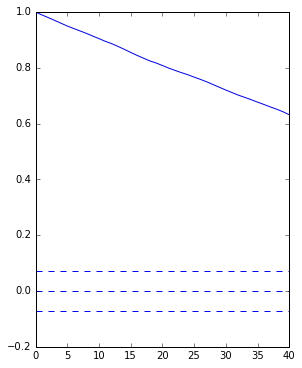

In [18]:
acf_result = stattools.acf(f['Open'])
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(f['Open'])),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(f['Open'])),linestyle='--')

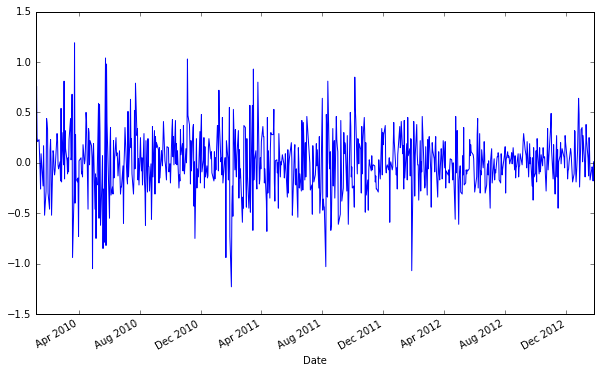

In [29]:
diff_yahoo = yahoo.Open - yahoo.Open.shift()
diff_yahoo.plot()
diff_yahoo.dropna(inplace = True)

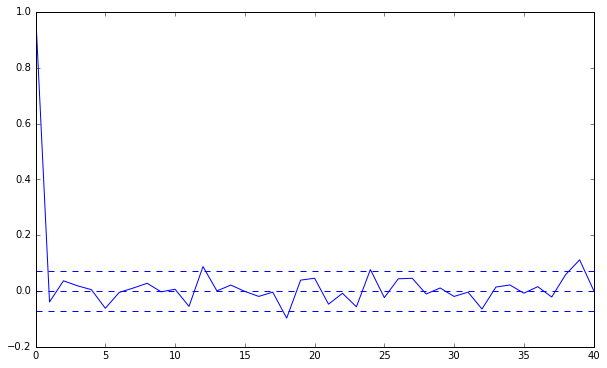

In [30]:
acf_result = stattools.acf(diff_yahoo)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(diff_f)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(diff_f)),linestyle='--')

### You're probably starting to wonder whether this is actually useful...Here's a better real-world example

In [31]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

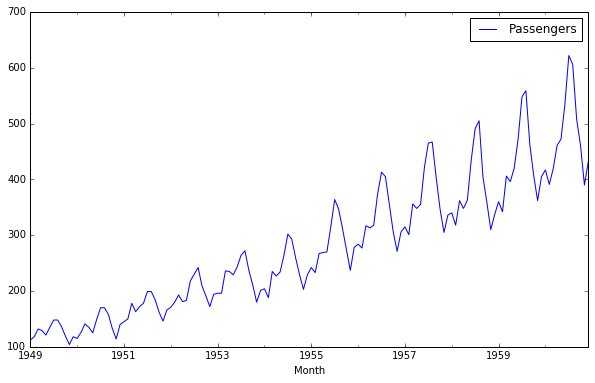

In [32]:
air_passengers.plot()

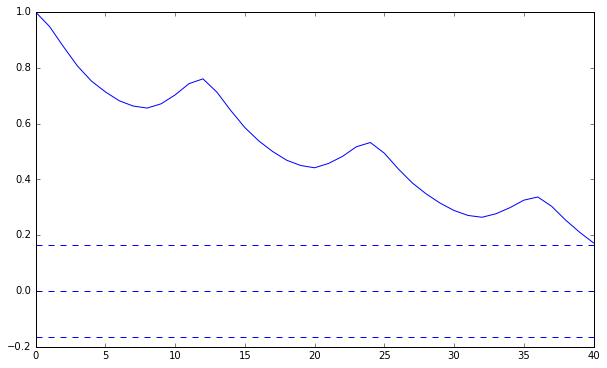

In [33]:
acf_result = stattools.acf(air_passengers)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(air_passengers)),linestyle='--')

### Hmmm, that looks meaningful but worrying

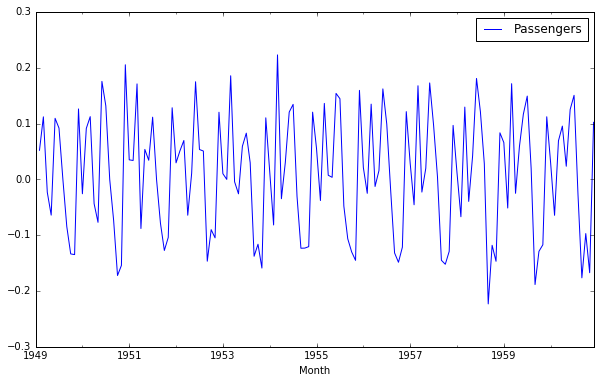

In [34]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

In [35]:
log_air_passengers_diff = log_air_passengers_diff.Passengers
log_air_passengers_diff.dropna(inplace = True)

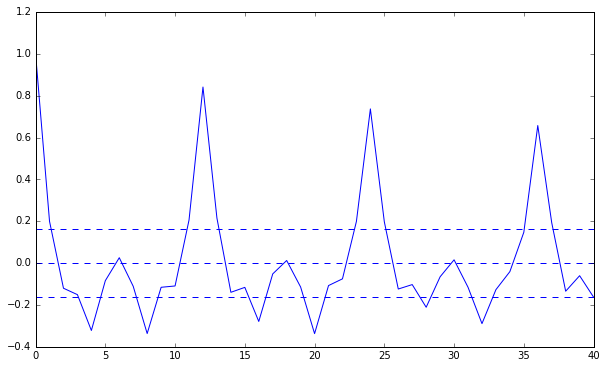

In [36]:
acf_result = stattools.acf(log_air_passengers_diff)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')